# Data Collection

In [ ]:
!pip install qbstyles

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import requests
import io
import time
import matplotlib.pyplot as plt
from qbstyles import mpl_style
mpl_style(dark=True)

In [ ]:
apikey = "9ebcef3f7cf3536459e06be3dbdfd70d"
ticker = "AAPL"
url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?from=2003-01-01&datatype=csv&apikey={apikey}"
response = requests.get(url)

In [ ]:
csv_data = response.content.decode('utf-8')
df = pd.read_csv(io.StringIO(csv_data))

In [ ]:
df = pd.read_csv("/content/engro.csv")

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df[['close']]
df.head(5)

,close
date,
2022-01-03,276.41
2022-01-04,275.20
2022-01-05,275.00
2022-01-06,273.95
2022-01-07,276.35


# KNN

In [ ]:
def knn(k):
  csv_data = response.content.decode('utf-8')
  df = pd.read_csv("/content/engro.csv")
  # Preprocess the data
  df['date'] = pd.to_datetime(df['date'])
  df = df.set_index('date')
  df = df[['close']]
  df = df.dropna()

  # Define the train and test data splits
  split_date = '2023-08-01'
  train = df.loc[df.index < split_date]
  test = df.loc[df.index >= split_date]

  """
  Try to run the model on k = 10-70 or greater than 80
  it would give lower accuracy whilst higher root mean square
  error.
  """
  start = time.time()
  # Train the KNN model
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(train[:-1], train[1:])
  end = time.time()
  elapsed = end - start
  # Predict the test data using the trained model
  preds = model.predict(test[:-1])

  # Evaluate the model's performance
  rmse = sqrt(mean_squared_error(test[1:], preds))
  print("-"*100)
  print(f"For K: {k}")
  print(f"KNN RMSE: {rmse:.2f}")
  print(f"Elapsed time: {elapsed:.4f} s")

  # Plot the actual and predicted prices
  plt.figure(figsize=(12, 6))
  plt.plot(test.index[1:], test['close'][1:], label='Actual')
  plt.plot(test.index[1:], preds, label='Predicted')
  plt.legend(loc='best')
  plt.xlabel('Date')
  plt.ylabel('Price')
  ticker='ENGRO'
  plt.title(f'{ticker} Stock Prices')

  # Set the background color to black
  # ax = plt.gca()
  # ax.set_facecolor('black')

  plt.show()


----------------------------------------------------------------------------------------------------
For K: 10
KNN RMSE: 4.23
Elapsed time: 0.0022 s


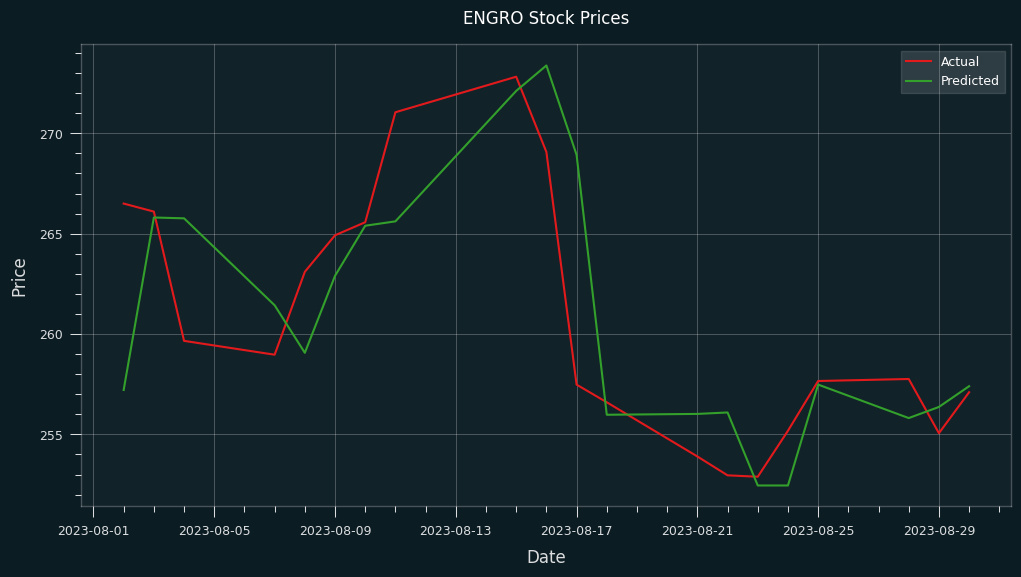

----------------------------------------------------------------------------------------------------
For K: 20
KNN RMSE: 4.18
Elapsed time: 0.0024 s


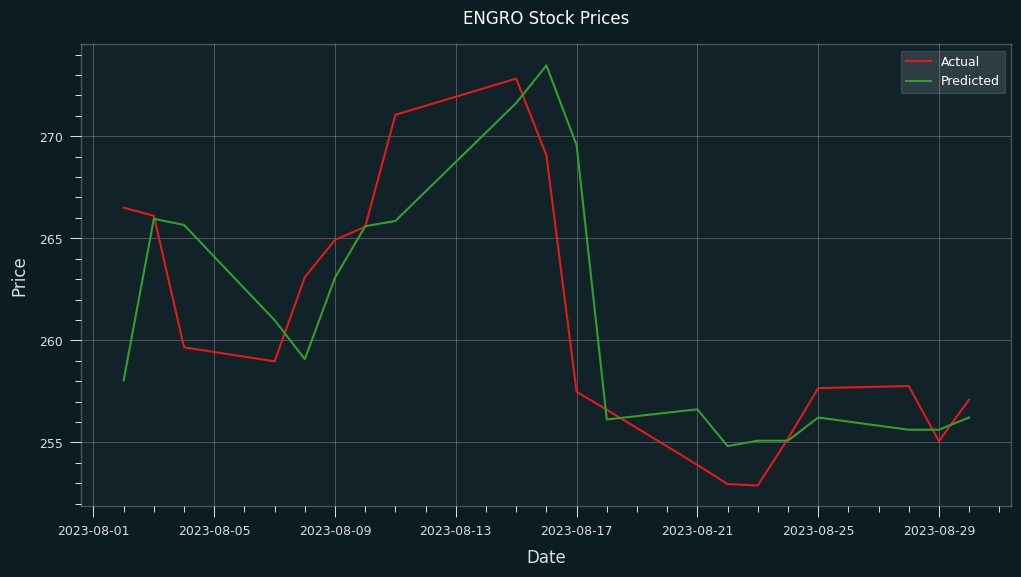

----------------------------------------------------------------------------------------------------
For K: 30
KNN RMSE: 4.11
Elapsed time: 0.0021 s


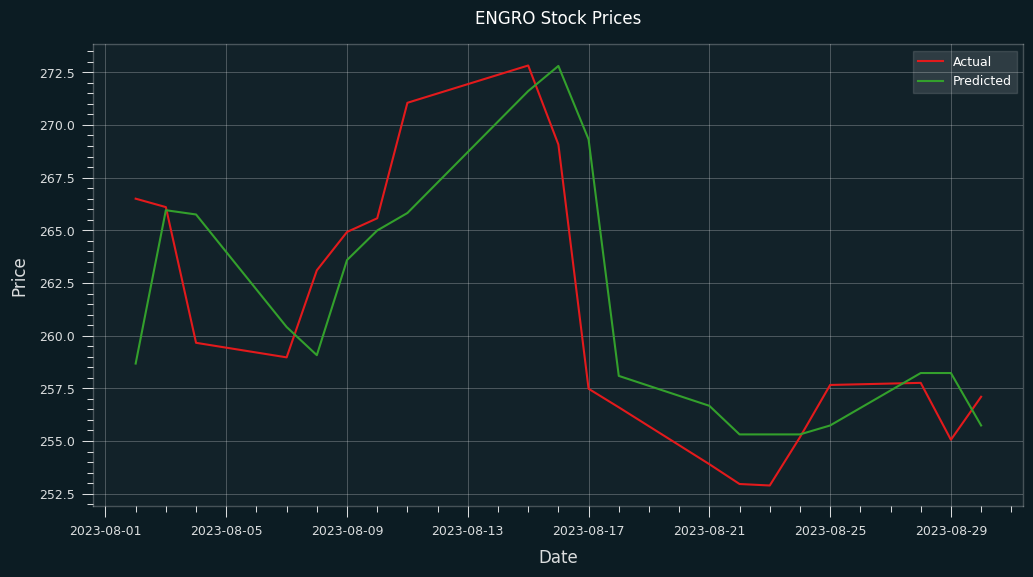

----------------------------------------------------------------------------------------------------
For K: 40
KNN RMSE: 4.15
Elapsed time: 0.0024 s


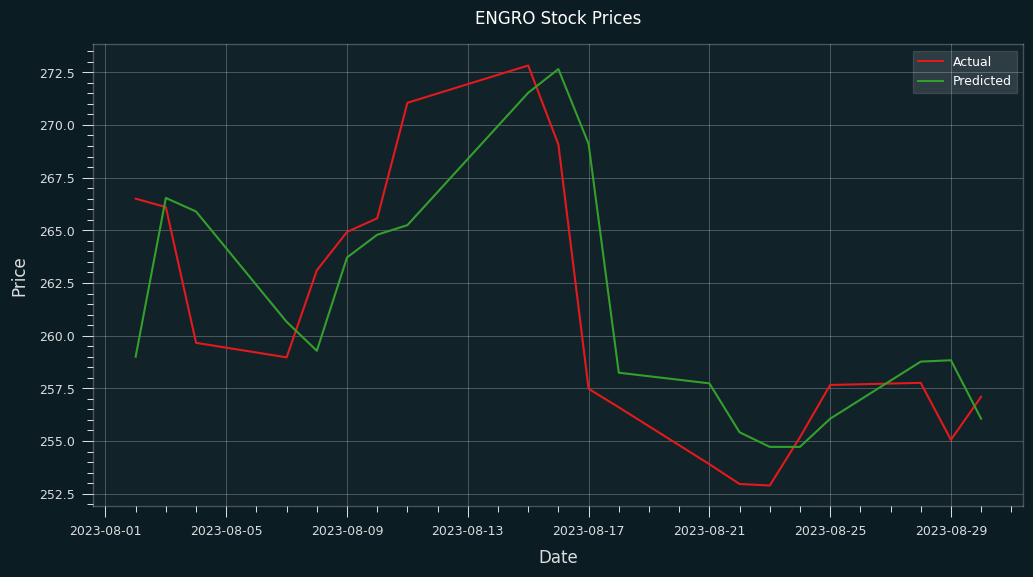

----------------------------------------------------------------------------------------------------
For K: 50
KNN RMSE: 4.10
Elapsed time: 0.0025 s


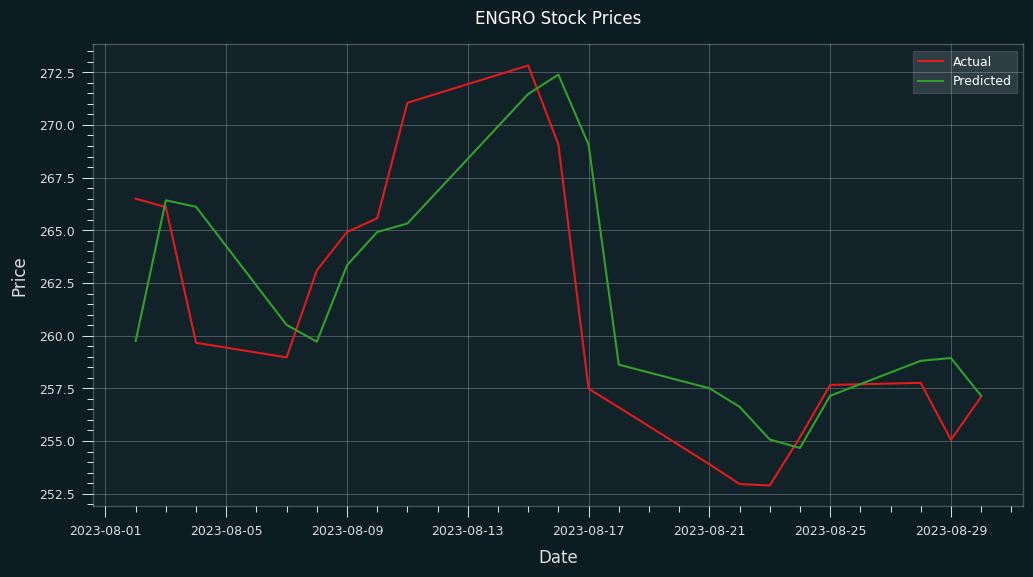

----------------------------------------------------------------------------------------------------
For K: 60
KNN RMSE: 4.09
Elapsed time: 0.0038 s


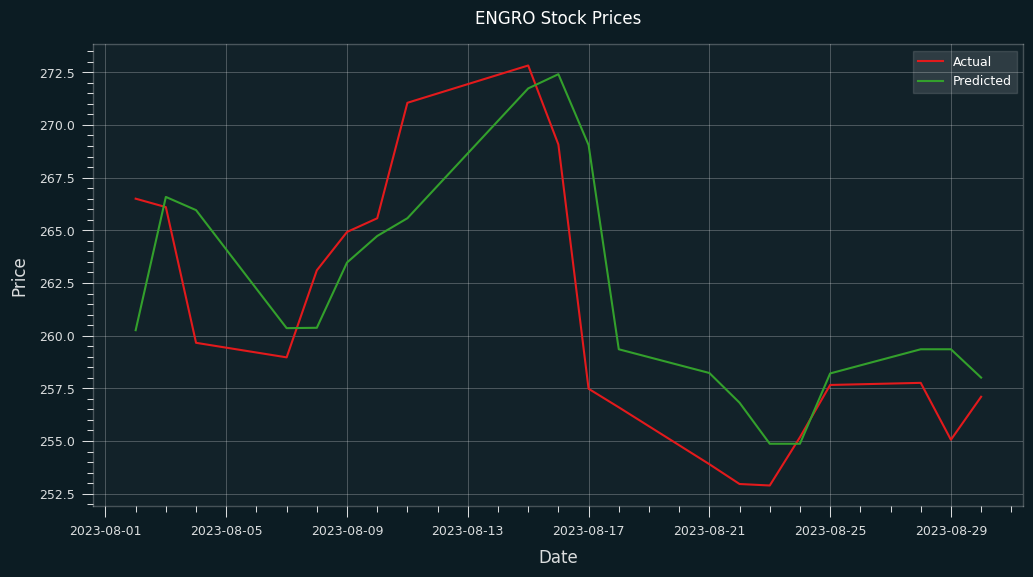

----------------------------------------------------------------------------------------------------
For K: 70
KNN RMSE: 4.29
Elapsed time: 0.0023 s


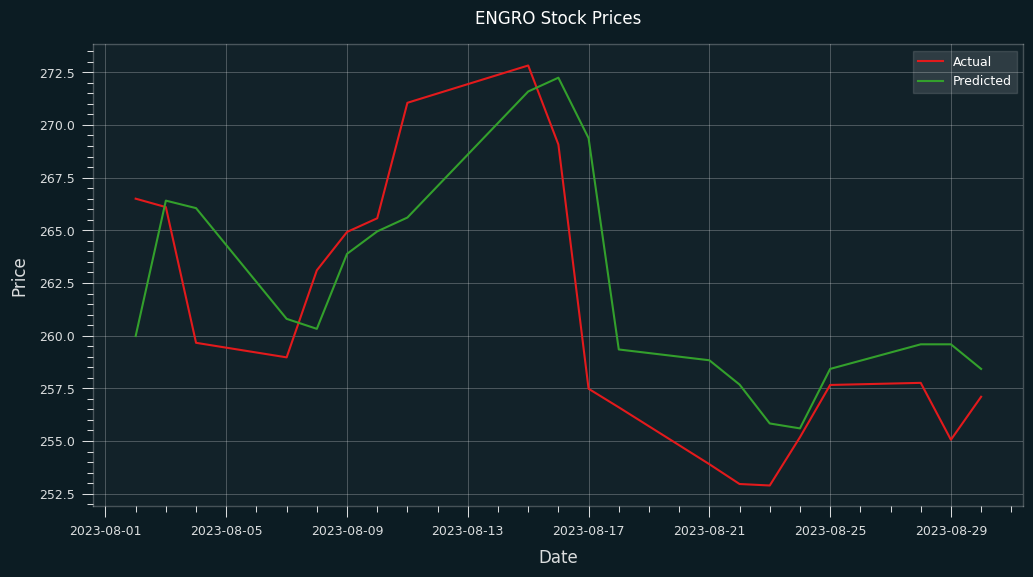

----------------------------------------------------------------------------------------------------
For K: 80
KNN RMSE: 4.28
Elapsed time: 0.0023 s


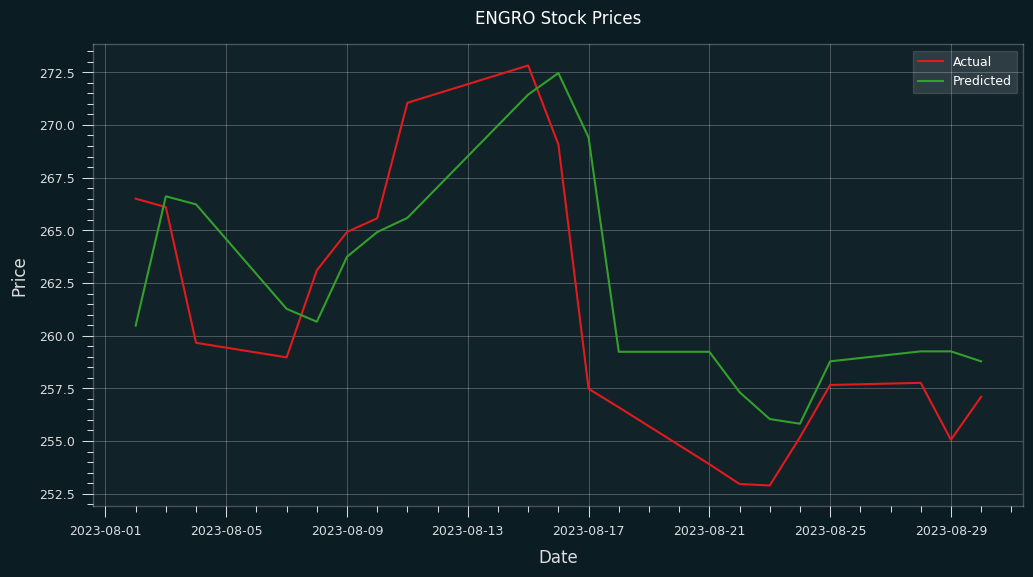

In [ ]:
k_val = [10, 20, 30, 40, 50, 60, 70, 80]
for k in k_val:
  knn(k)

In [ ]:
res=[]
n_trials=10
csv_data = response.content.decode('utf-8')
df = pd.read_csv(io.StringIO(csv_data))
# Preprocess the data
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df[['close']]
df = df.dropna()

# Define the train and test data splits
split_date = '2023-01-01'
train = df.loc[df.index < split_date]
test = df.loc[df.index >= split_date]
for trial_id in range(n_trials):
    for n_pts in [100,300,1000,3000,10000,30000,100000]:
        for metric in ['cosine','euclidean']:
            knn=KNeighborsRegressor(n_neighbors=80,metric=metric)
            starttime=time.time()
            knn.fit(train[:-1], train[1:])
            elapsed=time.time()-starttime
            res.append([elapsed,metric,trial_id])

res=pd.DataFrame(res,columns=['time','metric','trial'])
av_times=pd.pivot_table(res,columns='metric',values='time')
av_times

metric,cosine,euclidean
time,0.002282,0.003245


# LSTM

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import yfinance as yf

In [ ]:
df = yf.download("AAPL", start="2018-05-16", end="2023-05-15")
df.to_csv('AAPL.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.read_csv('/content/engro.csv')
df.head()

,date,close
0,"Jan 03, 22",276.41
1,"Jan 04, 22",275.20
2,"Jan 05, 22",275.00
3,"Jan 06, 22",273.95
4,"Jan 07, 22",276.35


In [ ]:
training_set = df.iloc[:300, 1:2].values
test_set = df.iloc[300:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 300):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

## Older Version

In [ ]:
model = Sequential()

# First Layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Second Layer
model.add(LSTM(units = 50, return_sequences = True))

# Third Layer
model.add(LSTM(units = 50, return_sequences = True))

# Fourth Layer
model.add(LSTM(units = 50))

# Output Layer
model.add(Dense(units = 1))

# Compiling the Neural Net
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

start = time.time()
# Fitting the Network to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
end = time.time()
print(f"Elapsed time for the Older Version: {end-start}")

Epoch 1/100
8/8 [==============================] - 6s 82ms/step - loss: 0.0955
Epoch 2/100
8/8 [==============================] - 1s 80ms/step - loss: 0.0307
Epoch 3/100
8/8 [==============================] - 1s 86ms/step - loss: 0.0274
Epoch 4/100
8/8 [==============================] - 1s 89ms/step - loss: 0.0298
Epoch 5/100
8/8 [==============================] - 1s 117ms/step - loss: 0.0268
Epoch 6/100
8/8 [==============================] - 1s 114ms/step - loss: 0.0254
Epoch 7/100
8/8 [==============================] - 1s 87ms/step - loss: 0.0220
Epoch 8/100
8/8 [==============================] - 1s 85ms/step - loss: 0.0292
Epoch 9/100
8/8 [==============================] - 1s 81ms/step - loss: 0.0219
Epoch 10/100
8/8 [==============================] - 1s 79ms/step - loss: 0.0251
Epoch 11/100
8/8 [==============================] - 1s 81ms/step - loss: 0.0205
Epoch 12/100
8/8 [==============================] - 1s 79ms/step - loss: 0.0182
Epoch 13/100
8/8 [=============================

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:300, 1:2]
dataset_test = df.iloc[300:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(109, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 1s 19ms/step


In [ ]:
# Visualising the results
plt.figure(figsize=(12, 6))
plt.plot(df.loc[300:, 'date'],dataset_test.values, color = 'red', label = 'Real Apple Stock Price')
plt.plot(df.loc[300:, 'date'], predicted_stock_price, color='blue', label='Predicted Apple Stock Price')
plt.xticks(np.arange(0,409,50))
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

## Improved Version

In [ ]:
model = Sequential()

# First Layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second Layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Third Layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Fourth Layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units = 1))

# Compiling the Neural Net
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

start = time.time()
# Fitting the Network to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
end = time.time()
print(f"Elapsed time for Improved Version: {end-start}")

Epoch 1/100
24/24 [==============================] - 13s 136ms/step - loss: 0.0568
Epoch 2/100
24/24 [==============================] - 3s 136ms/step - loss: 0.0056
Epoch 3/100
24/24 [==============================] - 4s 174ms/step - loss: 0.0059
Epoch 4/100
24/24 [==============================] - 4s 147ms/step - loss: 0.0047
Epoch 5/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0048
Epoch 6/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0045
Epoch 7/100
24/24 [==============================] - 5s 191ms/step - loss: 0.0047
Epoch 8/100
24/24 [==============================] - 3s 136ms/step - loss: 0.0049
Epoch 9/100
24/24 [==============================] - 3s 138ms/step - loss: 0.0049
Epoch 10/100
24/24 [==============================] - 4s 158ms/step - loss: 0.0049
Epoch 11/100
24/24 [==============================] - 4s 164ms/step - loss: 0.0050
Epoch 12/100
24/24 [==============================] - 3s 137ms/step - loss: 0.0040
Epoch 13/100

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(457, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 [==============================] - 2s 39ms/step


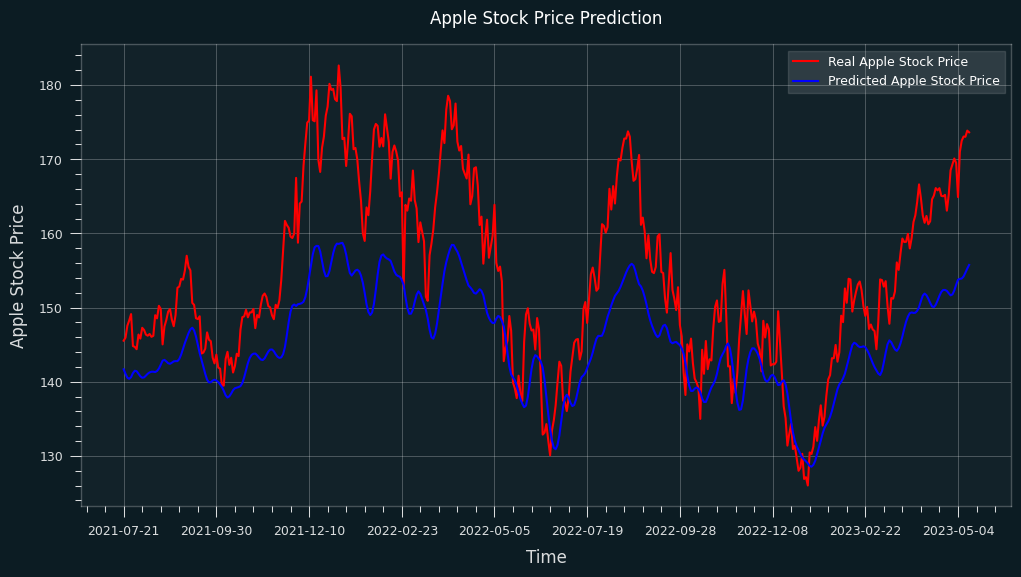

In [ ]:
# Visualising the results
plt.figure(figsize=(12, 6))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real Apple Stock Price')
plt.plot(df.loc[800:, 'Date'], predicted_stock_price, color='blue', label='Predicted Apple Stock Price')
plt.xticks(np.arange(0,460,50))
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()